### 1. 파일 불러오기

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('./kleague1_2023.csv', encoding = 'euc-kr')

df.head()

,경기번호,일자,월,일,요일,홈팀,홈 득점,원정팀,원정 득점,합계,...,경기장,관중수,원정팀.1,비고,Full 조회수(Y),Full 조회수(쿠플),Full 합계,2분 조회수(Y),2분 조회수(쿠플),쿠플 합계
0,1,2023-02-25,2,25,토,울산,2,전북,1,3,...,울산 문수,"28,039","2,037",주말,160000,280000,440000,100000,10000,110000
1,2,2023-02-25,2,25,토,서울,2,인천,1,3,...,서울 월드컵,"22,204","3,216",주말,76000,190000,266000,62000,9000,71000
2,3,2023-02-25,2,25,토,수원,0,광주,1,1,...,수원 월드컵,"10,348",409,주말,44000,78000,122000,41000,10000,51000
3,4,2023-02-26,2,26,일,포항,3,대구,2,5,...,포항 스틸야드,"14,089","1,152",주말,41000,96000,137000,37000,26000,63000
4,5,2023-02-26,2,26,일,제주,0,수원FC,0,0,...,제주 월드컵,"8,362",181,주말,28000,56000,84000,19000,13000,32000


In [18]:
df.keys()

Index(['경기번호', '일자', '월', '일', '요일', '홈팀', '홈 득점', '원정팀', '원정 득점', '합계',
       '경기결과1', '경기결과2', '경기장', '관중수', '원정팀.1', '비고', 'Full 조회수(Y)',
       'Full 조회수(쿠플)', 'Full 합계', '2분 조회수(Y)', '2분 조회수(쿠플)', '쿠플 합계'],
      dtype='object')

In [19]:
X = df['합계']
Y = df['쿠플 합계'] # 2분 하이라이트 합계를 '쿠플 합계'라고 잘못 적음

### 개요 : 경기당 양팀 득점 합계와 2분 하이라이트 조회수의 상관관계를 알기 위함

### 2. 산점도(Scatter plot)

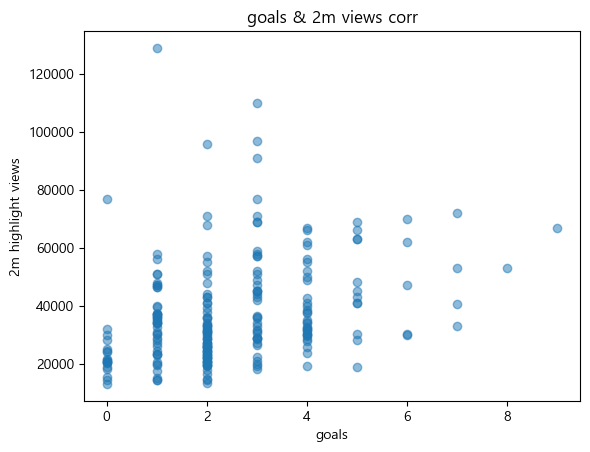

In [20]:
plt.scatter(X, Y, alpha=0.5)
plt.rc('font', family = 'Malgun Gothic')

plt.title('goals & 2m views corr')
plt.xlabel('goals')
plt.ylabel('2m highlight views')

plt.show()

### 3. 공분산 및 상관계수 구하기

In [21]:
# 공분산
cov = (np.sum(X*Y) - len(X)*np.mean(X)*np.mean(Y)) / len(X)
cov

9406.798245614034

In [22]:
# 상관계수
corr = cov / (np.std(X) * np.std(Y))
corr

0.32499836205457233

In [23]:
# corrcoef() 함수 이용
np.corrcoef(X,Y)[0,1]

0.3249983620545722

In [24]:
# 상관계수는 -1에서 1 사이의 값을 가지고, 0이면 두 변수간 선형관계가 전혀 없다는 것을 뜻한다.
# 보통 0.3 ~ 0.7 사이에 있으면 뚜렷한 양적 선형관계로 볼 수 있고,
# 0.7 ~ 1.0 사이에 있으면 강한 양적 선형관계라고 볼 수 있다.

### 4. 히트맵

C:\Users\USER\AppData\Local\Temp\ipykernel_15188\618621115.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(),
C:\Users\USER\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


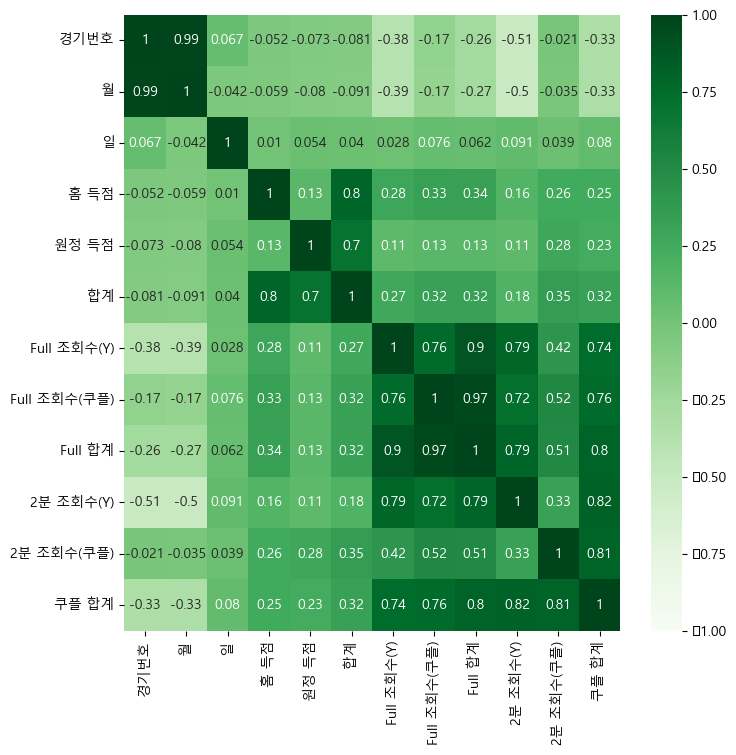

In [25]:
#heatmap으로 상관관계를 표시
import seaborn as sb
plt.rcParams["figure.figsize"] = (8,8)
sb.heatmap(df.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

### 5. 상관계수의 검정

In [26]:
import scipy.stats as stats

In [27]:
stats.pearsonr(X,Y)

PearsonRResult(statistic=0.3249983620545722, pvalue=5.241337856056246e-07)

In [28]:
# p-value 값이 0에 매우 가까운 작은 값이 나왔으므로
# 귀무가설(H0)을 기각
# 대립가설(H1)을 채택
# 대립가설 : 다득점 경기와 저득점 경기 하이라이트 조회수에는 차이가 있을 것이다.

### 6. 결론 : 2023 K리그1 228경기를 대상으로 '경기당 양팀 득점 합계'와 

### '2분 하이라이트 조회수'에는 약 0.32의 양의 상관관계가 있었다. 

### 따라서 다득점 경기일수록 경기 Full 하이라이트 조회수는 늘어나는 경향이 있다.